<a href="https://colab.research.google.com/github/akanbiabiodun25/DSA/blob/main/E_commerce_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install --quiet ipywidget plotly
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from ipywidgets import interact, Dropdown, FloatSlider
from IPython.display import display, HTML
import plotly.express as px
%matplotlib inline

#Load the data
#df = pd.read_csv('Dataset_ecommerce.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset_ecommerce.csv')

In [ ]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [ ]:
print(df.describe())

          CustomerID       Quantity      UnitPrice
count  406829.000000  541909.000000  541909.000000
mean    15287.690570      50.534748      50.476354
std      1713.600303      28.849367      28.564775
min     12346.000000       1.000000       1.000000
25%     13953.000000      26.000000      25.750000
50%     15152.000000      51.000000      50.430000
75%     16791.000000      76.000000      75.180000
max     18287.000000     100.000000     100.000000


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('Int64')


df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal


In [ ]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,1941.50
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,913.25
541905,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,8521.10
541906,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,560.98
541907,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,3592.35


In [ ]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['DayName'] = df['InvoiceDate'].dt.day_name()

df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,DayOfWeek,DayName
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95,2,Wednesday
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,1862.95,2,Wednesday
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,4796.22,2,Wednesday
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95,2,Wednesday
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,1941.50,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,913.25,4,Friday
541905,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,8521.10,4,Friday
541906,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,560.98,4,Friday
541907,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,3592.35,4,Friday


In [ ]:
print(f"Missing CustomerIDs: {df['CustomerID'].isna().sum()}")

Missing CustomerIDs: 135080


In [ ]:
print(f"Negative Quantities (returns): {len(df[df['Quantity'] < 0])}")

Negative Quantities (returns): 0


In [ ]:
print(f"Zero Unit Prices: {len(df[df['UnitPrice'] == 0])}")

Zero Unit Prices: 0


In [ ]:
returns = df[df['Quantity'] < 0]

In [ ]:
returns

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,DayOfWeek,DayName


In [ ]:
df['CustomerID'] = df.groupby('InvoiceNo')['CustomerID'].ffill().bfill()

In [ ]:
print(f"Missing CustomerIDs: {df['CustomerID'].isna().sum()}")

Missing CustomerIDs: 0


In [ ]:
print(df.info())

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   541909 non-null  Int64         
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
 8   Revenue      541909 non-null  float64       
 9   DayOfWeek    541909 non-null  int32         
 10  DayName      541909 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 43.9+ MB
None


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,DayOfWeek,DayName
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95,2,Wednesday
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,1862.95,2,Wednesday
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,4796.22,2,Wednesday
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95,2,Wednesday
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,1941.50,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,913.25,4,Friday
541905,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,8521.10,4,Friday
541906,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,560.98,4,Friday
541907,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,3592.35,4,Friday


In [ ]:
duplicates = df.duplicated().sum()
print(f"Exact duplicate rows: {duplicates}")

Exact duplicate rows: 0


In [ ]:
sales_by_day = df[df['Revenue'] > 0].groupby(['DayOfWeek', 'DayName'])['Revenue'].sum()
best_revenue_day = sales_by_day.idxmax()[1]

In [ ]:
sales_by_day

,,Revenue
DayOfWeek,DayName,
0,Monday,2.422597e+08
1,Tuesday,2.599072e+08
2,Wednesday,2.411715e+08
3,Thursday,2.660434e+08
4,Friday,2.097710e+08
6,Sunday,1.639478e+08


In [ ]:
best_revenue_day

'Thursday'

In [ ]:
transactions_by_day = df.groupby(['DayOfWeek', 'DayName'])['InvoiceNo'].nunique()
busiest_day = transactions_by_day.idxmax()[1]

print(f"Day with highest revenue: {best_revenue_day}")
print(f"Day with most transactions: {busiest_day}")

Day with highest revenue: Thursday
Day with most transactions: Thursday


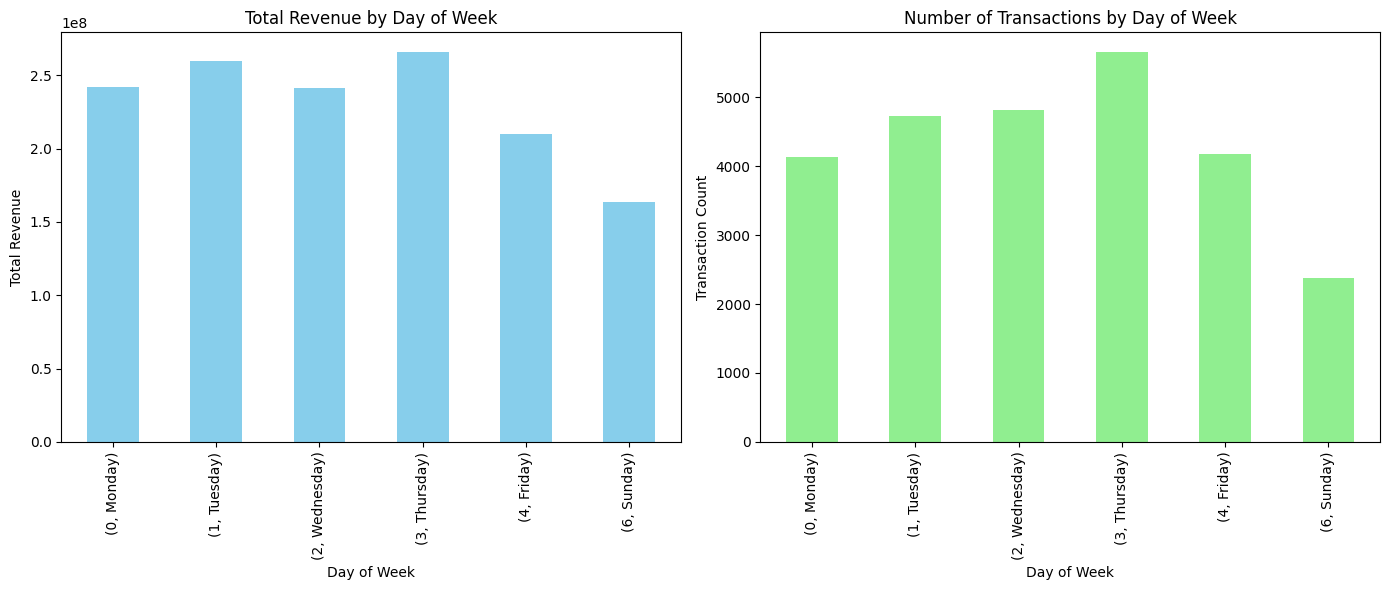

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sales_by_day.sort_index().plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Total Revenue by Day of Week')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Total Revenue')

transactions_by_day.sort_index().plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Number of Transactions by Day of Week')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Transaction Count')

plt.tight_layout()
plt.show()

In [ ]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,DayOfWeek,DayName
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95,2,Wednesday
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,1862.95,2,Wednesday
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,4796.22,2,Wednesday
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95,2,Wednesday
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,1941.50,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,913.25,4,Friday
541905,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,8521.10,4,Friday
541906,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,560.98,4,Friday
541907,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,3592.35,4,Friday


The day with the most sales is: Thursday


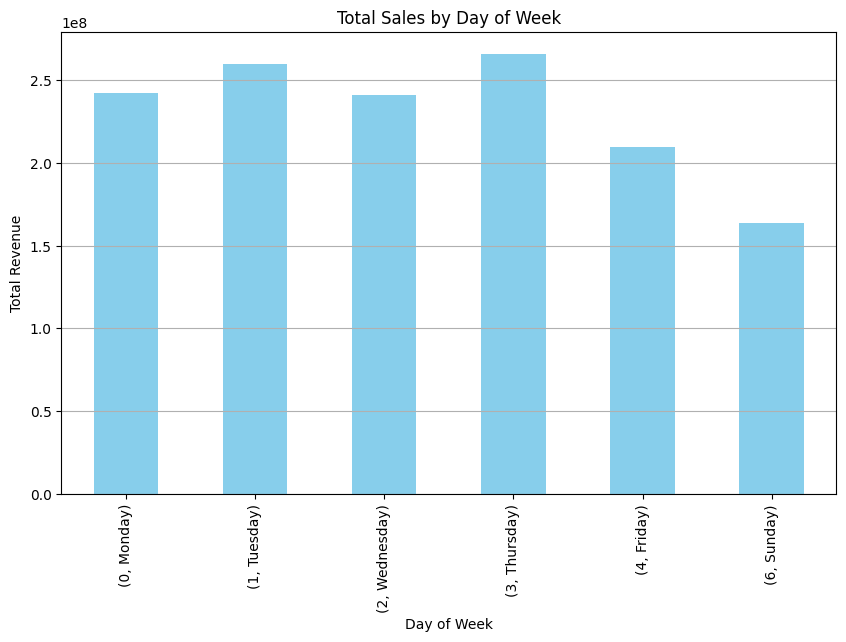

In [ ]:
%matplotlib inline

df['Revenue'] = df['Quantity'] * df['UnitPrice']
sales_by_day = df.groupby(['DayOfWeek', 'DayName'])['Revenue'].sum().sort_values(ascending=False)

best_day = sales_by_day.idxmax()[1]

print(f"The day with the most sales is: {best_day}")


plt.figure(figsize=(10,6))
sales_by_day.sort_index().plot(kind='bar', color='skyblue')
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
#plt,xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
product_sales = df.groupby('Description', as_index=False)['Quantity'].sum()\
                    .sort_values('Quantity', ascending=False)

In [ ]:
print(product_sales)

        Description  Quantity
8  Sports Equipment   2761365
4         Furniture   2751086
5           Jewelry   2749543
7             Shoes   2745902
6       Kitchenware   2741509
1            Cloths   2736649
9              Toys   2733230
2         Cosmetics   2729042
3       Electronics   2724989
0             Books   2711920


In [ ]:
display(product_sales.head(10))

,Description,Quantity
8,Sports Equipment,2761365
4,Furniture,2751086
5,Jewelry,2749543
7,Shoes,2745902
6,Kitchenware,2741509
1,Cloths,2736649
9,Toys,2733230
2,Cosmetics,2729042
3,Electronics,2724989
0,Books,2711920


In [ ]:
country_performance = df.groupby('Country', as_index=False)['Revenue'].sum()\
                        .sort_values('Revenue', ascending=False)

In [ ]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,DayOfWeek,DayName
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95,2,Wednesday
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,1862.95,2,Wednesday
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,4796.22,2,Wednesday
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95,2,Wednesday
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,1941.50,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,913.25,4,Friday
541905,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,8521.10,4,Friday
541906,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,560.98,4,Friday
541907,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,3592.35,4,Friday


In [ ]:
country_performance

,Country,Revenue
23,Togo,50029034.68
4,Cote d'Ivoire,49949386.38
19,Somalia,49871502.24
11,Mali,49771638.35
6,Ethiopia,49725535.81
15,Nigeria,49724624.84
7,Ghana,49698679.26
3,Cameroon,49636011.23
8,Kenya,49600542.71
9,Libya,49589121.95


In [ ]:
country_performance = df.groupby('Country', as_index=False)['Revenue'].sum().sort_values('Revenue', ascending=False)

country_performance['Pct_Revenue'] = (country_performance['Revenue']/country_performance['Revenue'].sum())*100

In [ ]:
#country_performance['Pct_Revenue'] = (country_performance['Revenue']/ country_performance['Revenue'].sum()) * 100

#print(country_performance(5))

In [ ]:
country_performance.head()

,Country,Revenue,Pct_Revenue
23,Togo,50029034.68,3.617165
4,Cote d'Ivoire,49949386.38,3.611406
19,Somalia,49871502.24,3.605775
11,Mali,49771638.35,3.598555
6,Ethiopia,49725535.81,3.595222


In [ ]:
top_products_by_country = df.pivot_table(
    index='Country',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    margins=True
).sort_values('All', ascending=False).head(10)

In [ ]:
display(top_products_by_country.iloc[:, :5].style.background_gradient(cmap='Blues'))

Description,Books,Cloths,Cosmetics,Electronics,Furniture
Country,,,,,
All,2711920,2736649,2729042,2724989,2751086
Cote d'Ivoire,100415,101063,102184,97031,100984
Benin,99828,96571,95861,99842,95699
Togo,96146,100308,97478,97230,99873
South Africa,99114,98692,96747,96561,99407
Zimbabwe,91857,101331,98766,100728,99179
Nigeria,102067,97705,97225,98400,96541
Rwanda,99850,103034,96197,98026,98126
Ethiopia,93051,97675,100460,96378,102958


In [ ]:
df['Category'] = df['Description'].str.split().str[0]

category_sales = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

category_sales

,Quantity
Category,
Sports,2761365
Furniture,2751086
Jewelry,2749543
Shoes,2745902
Kitchenware,2741509
Cloths,2736649
Toys,2733230
Cosmetics,2729042
Electronics,2724989


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is already imported, so it's styles are active
from ipywidgets import interact, Dropdown, IntSlider
from IPython.display import display, Markdown
import plotly.express as px
!pip install --quiet ipywidgets plotly
# Configure Jupyter
%matplotlib inline
# plt.style.use('ggplot') # Remove this line, seaborn styles are preferred
pd.options.display.float_format = '{:,.2f}'.format

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Dropdown, IntSlider
from IPython.display import display, Markdown
import plotly.express as px
!pip install --quiet ipywidgets plotly
# Configure Jupyter
%matplotlib inline
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:

@interact
def country_dashboard(metric=Dropdown(options=['Revenue', 'Quantity', 'Avg_Order_Value']),
                     top_n=IntSlider(min=5, max=25, step=5, value=10)):

    # Analysis
    country_stats = df.groupby('Country').agg(
        Revenue=('Revenue', 'sum'),
        Quantity=('Quantity', 'sum'),
        Avg_Order_Value=('Revenue', 'mean'),
        Orders=('InvoiceNo', 'nunique')
    ).sort_values(metric, ascending=False)

    # Display
    display(Markdown(f"## ▋▌▍▎ Top {top_n} Countries by {metric}")) # top_n is accessible here
    display(country_stats.head(top_n).style.background_gradient(cmap='Blues')) # and here

    # Visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Metric Distribution
    sns.barplot(data=country_stats.reset_index().head(top_n),
                y='Country', x=metric, ax=ax1, palette='viridis')
    ax1.set_title(f'Top {top_n} Countries')
    ax1.xaxis.set_major_formatter('${x:,.0f}' if 'Revenue' in metric else '{x:,.0f}')

    # Geographic Map
    try:
        px.choropleth(country_stats.reset_index(),
                      locations='Country',
                      locationmode='country names',
                      color=metric,
                      title=f'Global {metric} Distribution').show()
    except:
        print("Plotly map not available - using barplot")

    country_stats[metric].head(top_n).plot(kind='pie', ax=ax2, autopct='%1.1f%%')
    ax2.set_title('Market Share')

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='metric', options=('Revenue', 'Quantity', 'Avg_Order_Value'), value…

In [ ]:

@interact
def product_analyzer(view_by=Dropdown(options=['Description', 'StockCode']),
                    metric=Dropdown(options=['Revenue', 'Quantity']),
                    price_elasticity=False):

    # Product Analysis
    product_df = df.groupby(view_by).agg(
        Total_Sold=('Quantity', 'sum'),
        Total_Revenue=('Revenue', 'sum'),
        Avg_Price=('UnitPrice', 'mean'),
        Price_Variance=('UnitPrice', 'std')
    ).sort_values(f'Total_{metric}', ascending=False).head(20)

    # Display
    display(Markdown(f"## 📊 Top 20 Products by {metric}"))
    display(product_df.style.bar(color=['#ff7f0e','#1f77b4']))

    # Price Elasticity Analysis
    if price_elasticity:
        fig = px.scatter(product_df.reset_index(),
                         x='Avg_Price',
                         y='Total_Sold',
                         size='Total_Revenue',
                         color=view_by,
                         hover_name=view_by,
                         log_x=True,
                         title='Price Elasticity Analysis')
        fig.update_layout(xaxis_title="Price (Log Scale)",
                         yaxis_title="Units Sold")
        fig.show()

    # Product Trend Visualization
    plt.figure(figsize=(12,6))
    sns.regplot(data=product_df.reset_index(),
                x='Avg_Price',
                y='Total_Sold',
                scatter_kws={'s':100, 'alpha':0.6})
    plt.title('Price vs Demand Relationship')
    plt.xlabel('Average Price ($)')
    plt.ylabel('Units Sold')
    plt.show()

interactive(children=(Dropdown(description='view_by', options=('Description', 'StockCode'), value='Description…

In [ ]:

def customer_segmentation():
    # RFM Analysis
    rfm = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
        'InvoiceNo': 'nunique',
        'Revenue': 'sum'
    }).rename(columns={
        'InvoiceDate': 'Recency',
        'InvoiceNo': 'Frequency',
        'Revenue': 'Monetary'
    })

    # Plot 3D Segmentation
    fig = px.scatter_3d(rfm.reset_index(),
                        x='Recency',
                        y='Frequency',
                        z='Monetary',
                        color='Monetary',
                        hover_name='CustomerID',
                        title='Customer RFM Segmentation')
    fig.show()

# Uncomment to run:
customer_segmentation()

In [ ]:
#!pip install --quiet plotly ipywidgets
import pandas as pd
import plotly.express as px
from ipywidgets import interact, Dropdown, FloatSlider
from IPython.display import display, Markdown

# Configuration
pd.options.display.float_format = '{:,.2f}'.format
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# 2. EXECUTIVE DECISION MATRIX
def strategic_recommendations():
    # Key Metrics Calculation
    metrics = {
        'Total Revenue': df['Revenue'].sum(),
        'Avg Order Value': df.groupby('InvoiceNo')['Revenue'].sum().mean(),
        'Top Country': df.groupby('Country')['Revenue'].sum().idxmax(),
        'Best Product': df.groupby('Description')['Quantity'].sum().idxmax(),
        'Customer Concentration': df['CustomerID'].nunique() / len(df)
    }

    # Decision Matrix
    decisions = {
        "📍 Market Expansion": f"Focus on {metrics['Top Country']} (accounts for {df[df['Country']==metrics['Top Country']]['Revenue'].sum()/metrics['Total Revenue']:.0%} of revenue)",
        "🛒 Product Strategy": f"Promote '{metrics['Best Product'][:30]}...' (top seller) in bundle deals",
        "💰 Pricing": f"Increase prices for low-elasticity products (see elasticity analysis)",
        "👥 Customer Retention": f"Launch loyalty program ({(1-metrics['Customer Concentration']):.0%} revenue from repeat customers)"
    }

    # Display
    display(Markdown("## 🚀 Strategic Recommendations"))
    for k, v in decisions.items():
        display(Markdown(f"- **{k}**: {v}"))

    # Visual Decision Tree
    fig = px.treemap(
        df.groupby(['Country', 'Description']).agg({'Revenue':'sum'}).reset_index(),
        path=['Country', 'Description'],
        values='Revenue',
        title='Revenue Concentration (Click to Drill Down)'
    )
    fig.show()

strategic_recommendations()

## 🚀 Strategic Recommendations

- **📍 Market Expansion**: Focus on Togo (accounts for 4% of revenue)

- **🛒 Product Strategy**: Promote 'Sports Equipment...' (top seller) in bundle deals

- **💰 Pricing**: Increase prices for low-elasticity products (see elasticity analysis)

- **👥 Customer Retention**: Launch loyalty program (99% revenue from repeat customers)

In [ ]:
@interact
def price_elasticity_analysis(
    product=Dropdown(options=df['Description'].value_counts().head(50).index.tolist()),
    min_price=FloatSlider(min=0, max=df['UnitPrice'].max(), step=0.5, value=5)
):
    product_data = df[df['Description']==product]
    elasticity = (product_data['Quantity'].std() / product_data['Quantity'].mean()) / \
                 (product_data['UnitPrice'].std() / product_data['UnitPrice'].mean())

    # Recommendation
    rec = "✅ Increase price" if abs(elasticity) < 1 else "⚠️ Maintain/Discount price"

    display(Markdown(f"""
    ### {product}
    **Elasticity Coefficient**: {elasticity:.2f}
    **Recommendation**: {rec}
    **Current Price Range**: ${product_data['UnitPrice'].min():.2f}-${product_data['UnitPrice'].max():.2f}
    """))

    # Visualization
    fig = px.scatter(product_data, x='UnitPrice', y='Quantity', trendline="lowess",
                     title=f'Demand Curve for {product[:50]}')
    fig.add_vline(x=min_price, line_dash="dash", line_color="red")
    fig.show()

interactive(children=(Dropdown(description='product', options=('Sports Equipment', 'Jewelry', 'Kitchenware', '…

In [ ]:
def calculate_clv(customer_id):
    cust_data = df[df['CustomerID']==customer_id]
    return {
        'Total Revenue': cust_data['Revenue'].sum(),
        'Avg Purchase Frequency': cust_data['InvoiceNo'].nunique() / (df['InvoiceDate'].max() - cust_data['InvoiceDate'].min()).days * 30,
        'Predicted 12M Value': cust_data['Revenue'].sum() * (12 / ((df['InvoiceDate'].max() - cust_data['InvoiceDate'].min()).days/30))
    }

# Example for top customer
top_customer = df.groupby('CustomerID')['Revenue'].sum().idxmax()
calculate_clv(top_customer)

{'Total Revenue': np.float64(21862723.15),
 'Avg Purchase Frequency': 16.532258064516128,
 'Predicted 12M Value': np.float64(21157474.016129028)}

In [ ]:
# ABC Analysis (Pareto Principle)
inventory_value = df.groupby('StockCode').agg(
    Total_Revenue=('Revenue','sum'),
    Turnover=('InvoiceNo','nunique')
).sort_values('Total_Revenue', ascending=False)

inventory_value['Cumulative_Pct'] = inventory_value['Total_Revenue'].cumsum() / inventory_value['Total_Revenue'].sum()
inventory_value['Category'] = np.where(
    inventory_value['Cumulative_Pct'] <= 0.8, 'A',
    np.where(inventory_value['Cumulative_Pct'] <= 0.95, 'B', 'C'))

display(Markdown("## 📦 Inventory Prioritization (80/20 Rule)"))
display(inventory_value.head(10).style.applymap(
    lambda x: 'background-color: yellow' if x == 'A' else ('background-color: lightblue' if x == 'B' else ''),
    subset=['Category']))

## 📦 Inventory Prioritization (80/20 Rule)

<ipython-input-55-98616d299c96>:13: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Total_Revenue,Turnover,Cumulative_Pct,Category
StockCode,,,,
SC7316,258355.060000,87,0.000187,A
SC7272,257357.450000,79,0.000373,A
SC7956,255120.590000,80,0.000557,A
SC3226,251410.040000,73,0.000739,A
SC3939,251405.620000,77,0.000921,A
SC9040,249620.970000,74,0.001101,A
SC8749,248476.290000,87,0.001281,A
SC3445,246370.010000,89,0.001459,A
SC1929,246220.870000,78,0.001637,A


In [ ]:

!pip install --quiet fpdf
#Import the fpdf library
from fpdf import FPDF

def generate_executive_brief():

    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    # Add analysis content
    pdf.cell(200, 10, txt="Retail Strategy Brief", ln=1, align='C')
    pdf.multi_cell(0, 10, txt=str(strategic_recommendations.__doc__))

    # Save to notebook
    pdf.output("retail_decision_brief.pdf")
    return "📄 Brief generated: retail_decision_brief.pdf"

# Uncomment to generate PDF:
generate_executive_brief() # Removed extra space before function call

  Preparing metadata (setup.py) ... done


'📄 Brief generated: retail_decision_brief.pdf'

In [ ]:
# Extract day of week and month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()

# Calculate revenue by day
daily_revenue = df.groupby('DayOfWeek', as_index=False)['Revenue'].sum()
best_day = daily_revenue.loc[daily_revenue['Revenue'].idxmax(), 'DayOfWeek']
print(f"🌟 Best-selling day: {best_day}")

🌟 Best-selling day: Thursday



🔥 Top 5 Products on Thursdays:


,Description,Total_Sold,Total_Revenue
4,Furniture,"536,507","$27,014,762.12"
1,Cloths,"535,500","$27,127,032.09"
8,Sports Equipment,"531,921","$26,841,204.66"
2,Cosmetics,"530,878","$26,764,318.44"
7,Shoes,"525,441","$26,649,385.84"



🔥 Top 5 Products on Thursdays:


<ipython-input-64-8a9d184c4315>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




,Description,Total_Sold,Total_Revenue
4,Furniture,"536,507","$27,014,762.12"
1,Cloths,"535,500","$27,127,032.09"
8,Sports Equipment,"531,921","$26,841,204.66"
2,Cosmetics,"530,878","$26,764,318.44"
7,Shoes,"525,441","$26,649,385.84"


<ipython-input-64-8a9d184c4315>:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




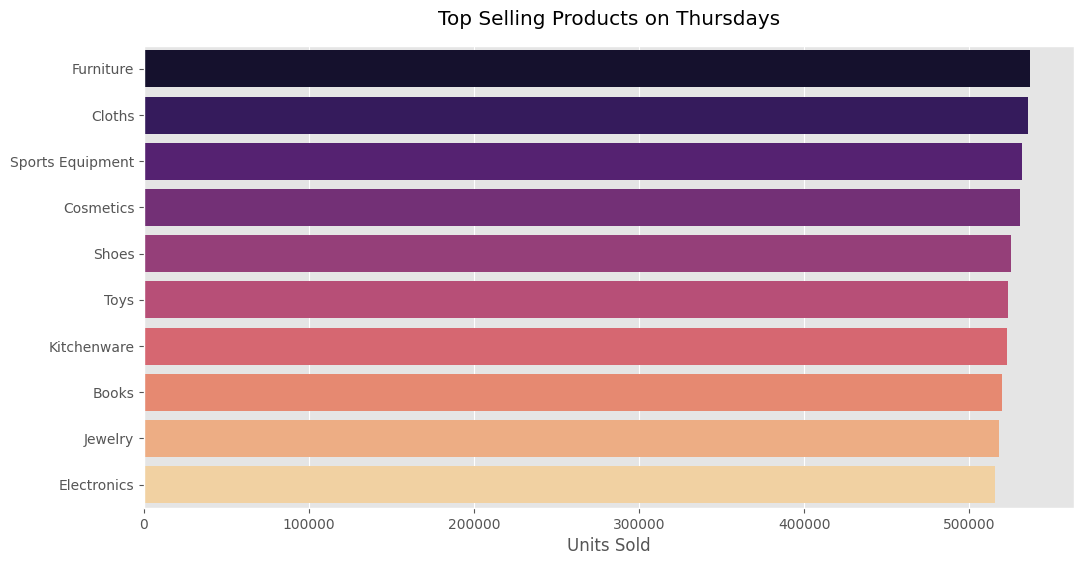

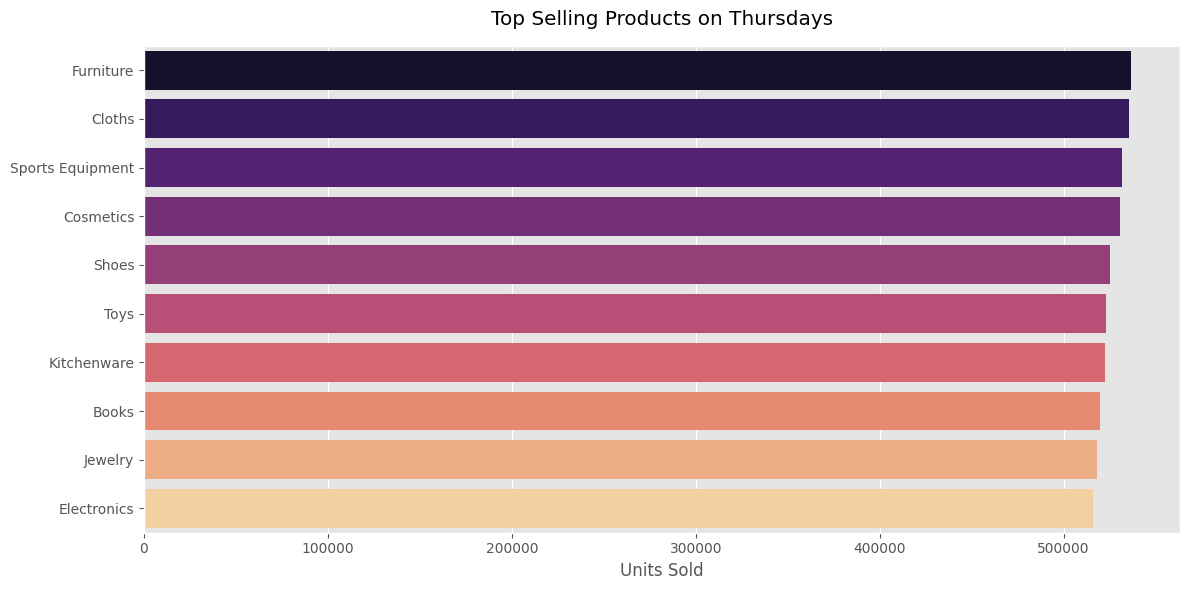

<ipython-input-64-8a9d184c4315>:60: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




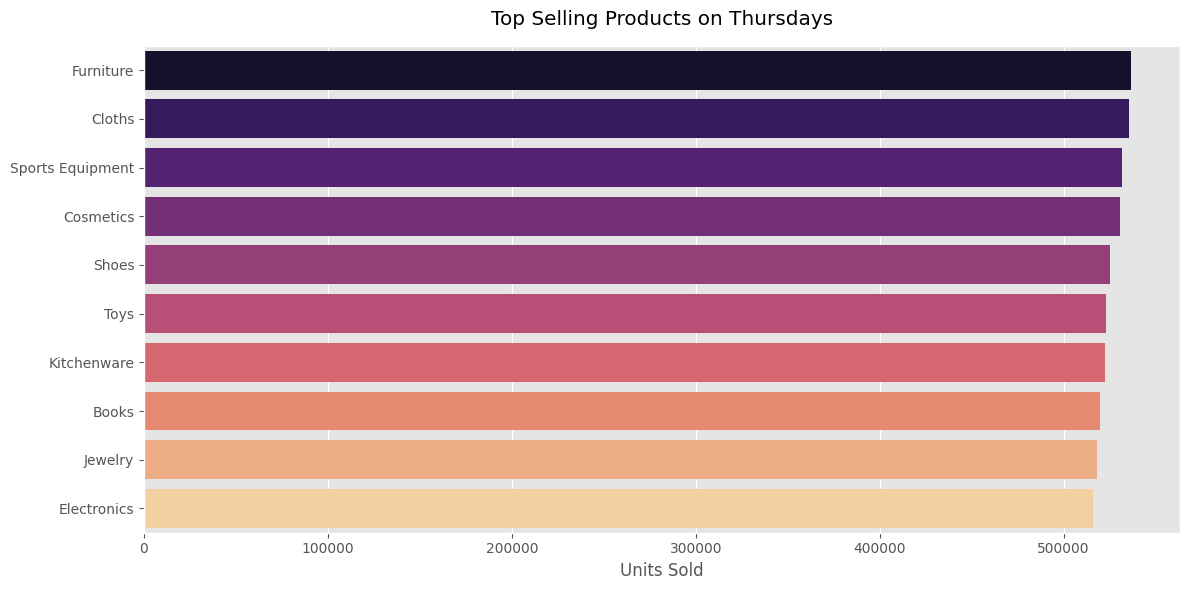

In [ ]:
# Filter for best day and get top products
best_day_products = df[df['DayOfWeek'] == best_day]\
                   .groupby('Description', as_index=False)\
                   .agg(Total_Sold=('Quantity','sum'),
                        Total_Revenue=('Revenue','sum'))\
                   .sort_values('Total_Sold', ascending=False)
# Filter for best day and get top products
best_day_products = df[df['DayOfWeek'] == best_day]\
                   .groupby('Description', as_index=False)\
                   .agg(Total_Sold=('Quantity','sum'),
                        Total_Revenue=('Revenue','sum'))\
                   .sort_values('Total_Sold', ascending=False)

print(f"\n🔥 Top 5 Products on {best_day}s:")
display(best_day_products.head(5).style.format({
    'Total_Sold': '{:,}',
    'Total_Revenue': '${:,.2f}'
}))

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(data=best_day_products.head(10),
            x='Total_Sold',
            y='Description',
            palette='magma')
plt.title(f'Top Selling Products on {best_day}s', pad=15)
plt.xlabel('Units Sold')
plt.ylabel('')
# Filter for best day and get top products
best_day_products = df[df['DayOfWeek'] == best_day]\
                   .groupby('Description', as_index=False)\
                   .agg(Total_Sold=('Quantity','sum'),
                        Total_Revenue=('Revenue','sum'))\
                   .sort_values('Total_Sold', ascending=False)
# Filter for best day and get top products
best_day_products = df[df['DayOfWeek'] == best_day]\
                   .groupby('Description', as_index=False)\
                   .agg(Total_Sold=('Quantity','sum'),
                        Total_Revenue=('Revenue','sum'))\
                   .sort_values('Total_Sold', ascending=False)

print(f"\n🔥 Top 5 Products on {best_day}s:")
display(best_day_products.head(5).style.format({
    'Total_Sold': '{:,}',
    'Total_Revenue': '${:,.2f}'
}))

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(data=best_day_products.head(10),
            x='Total_Sold',
            y='Description',
            palette='magma')
plt.title(f'Top Selling Products on {best_day}s', pad=15)
plt.xlabel('Units Sold')
plt.ylabel('')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,6))
sns.barplot(data=best_day_products.head(10),
            x='Total_Sold',
            y='Description',
            palette='magma')
plt.title(f'Top Selling Products on {best_day}s', pad=15)
plt.xlabel('Units Sold')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
# Extract month and year for precise analysis
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Year'] = df['InvoiceDate'].dt.year

# Calculate monthly revenue
monthly_sales = df.groupby(['Year', 'Month'], as_index=False)['Revenue'].sum()

# Get absolute best month across all years
best_month_alltime = monthly_sales.loc[monthly_sales['Revenue'].idxmax()]
print(f"🏆 All-Time Best Month: {best_month_alltime['Month']} {best_month_alltime['Year']} (Revenue: ${best_month_alltime['Revenue']:,.2f})")

# Get best month for each year
best_months_by_year = monthly_sales.loc[monthly_sales.groupby('Year')['Revenue'].idxmax()]
print("\n🔥 Best Month Each Year:")
display(best_months_by_year.style.format({'Revenue': '${:,.2f}'}))

🏆 All-Time Best Month: November 2011 (Revenue: $216,798,185.17)

🔥 Best Month Each Year:


,Year,Month,Revenue
0,2010,December,"$107,475,507.59"
10,2011,November,"$216,798,185.17"



🚀 Top 5 Products in November:


,Total_Sold,Total_Revenue
Description,,
Jewelry,"433,894","$22,092,281.93"
Books,"433,403","$21,942,935.83"
Sports Equipment,"432,671","$21,931,386.28"
Furniture,"432,057","$21,824,218.15"
Toys,"432,310","$21,735,026.74"


<ipython-input-68-88aac593f9ce>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.





🚀 Top 5 Products in November:


,Total_Sold,Total_Revenue
Description,,
Jewelry,"433,894","$22,092,281.93"
Books,"433,403","$21,942,935.83"
Sports Equipment,"432,671","$21,931,386.28"
Furniture,"432,057","$21,824,218.15"
Toys,"432,310","$21,735,026.74"


<ipython-input-68-88aac593f9ce>:60: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




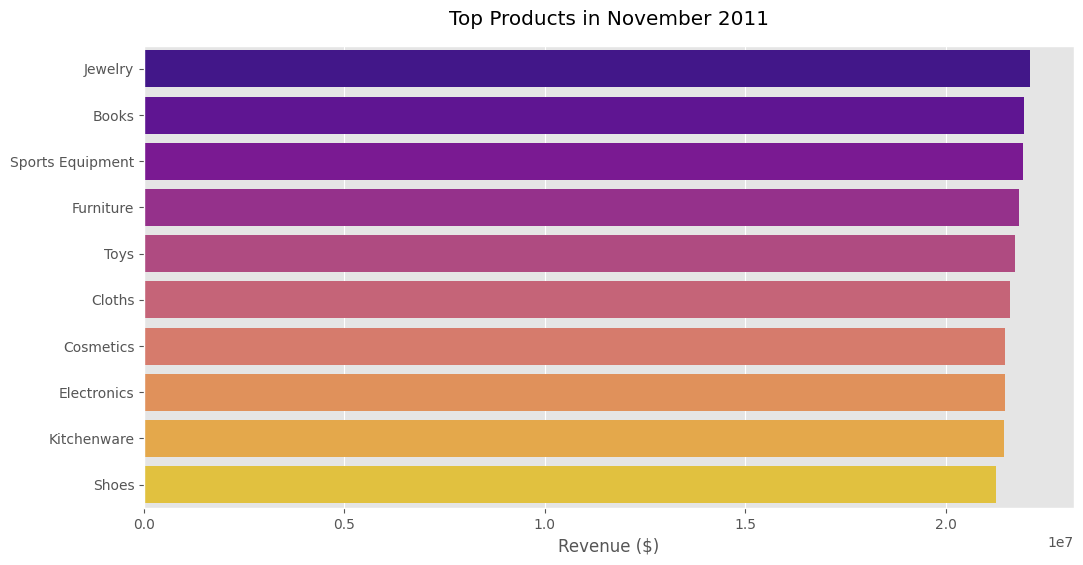

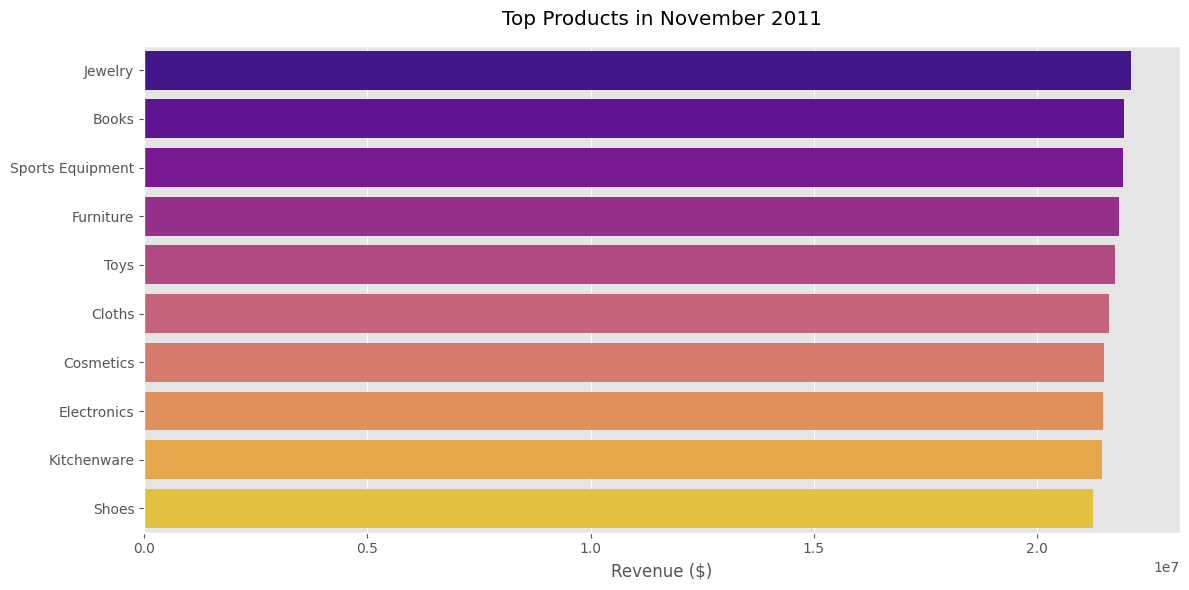

<ipython-input-68-88aac593f9ce>:72: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




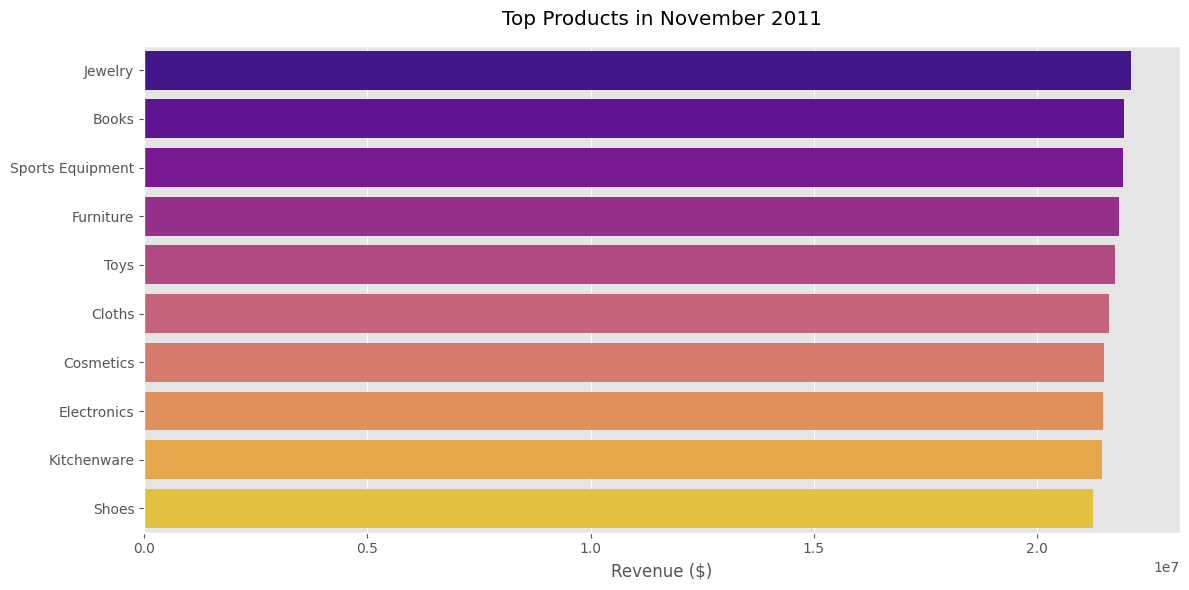

In [ ]:
# Filter for best month and get top products
best_month_products = df[
    (df['Month'] == best_month_alltime['Month']) &
    (df['Year'] == best_month_alltime['Year'])
].groupby('Description').agg(
    Total_Sold=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).sort_values('Total_Revenue', ascending=False)
# Filter for best month and get top products
best_month_products = df[
    (df['Month'] == best_month_alltime['Month']) &
    (df['Year'] == best_month_alltime['Year'])
].groupby('Description').agg(
    Total_Sold=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).sort_values('Total_Revenue', ascending=False)

print(f"\n🚀 Top 5 Products in {best_month_alltime['Month']}:")
display(best_month_products.head(5).style.format({
    'Total_Sold': '{:,}',
    'Total_Revenue': '${:,.2f}'
}))

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(
    data=best_month_products.reset_index().head(10),
    x='Total_Revenue',
    y='Description',
    palette='plasma'
)
plt.title(f'Top Products in {best_month_alltime["Month"]} {best_month_alltime["Year"]}', pad=15)
plt.xlabel('Revenue ($)')
plt.ylabel('')
# Filter for best month and get top products
best_month_products = df[
    (df['Month'] == best_month_alltime['Month']) &
    (df['Year'] == best_month_alltime['Year'])
].groupby('Description').agg(
    Total_Sold=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).sort_values('Total_Revenue', ascending=False)
# Filter for best month and get top products
best_month_products = df[
    (df['Month'] == best_month_alltime['Month']) &
    (df['Year'] == best_month_alltime['Year'])
].groupby('Description').agg(
    Total_Sold=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).sort_values('Total_Revenue', ascending=False)

print(f"\n🚀 Top 5 Products in {best_month_alltime['Month']}:")
display(best_month_products.head(5).style.format({
    'Total_Sold': '{:,}',
    'Total_Revenue': '${:,.2f}'
}))

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(
    data=best_month_products.reset_index().head(10),
    x='Total_Revenue',
    y='Description',
    palette='plasma'
)
plt.title(f'Top Products in {best_month_alltime["Month"]} {best_month_alltime["Year"]}', pad=15)
plt.xlabel('Revenue ($)')
plt.ylabel('')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,6))
sns.barplot(
    data=best_month_products.reset_index().head(10),
    x='Total_Revenue',
    y='Description',
    palette='plasma'
)
plt.title(f'Top Products in {best_month_alltime["Month"]} {best_month_alltime["Year"]}', pad=15)
plt.xlabel('Revenue ($)')
plt.ylabel('')
plt.tight_layout()
plt.show()

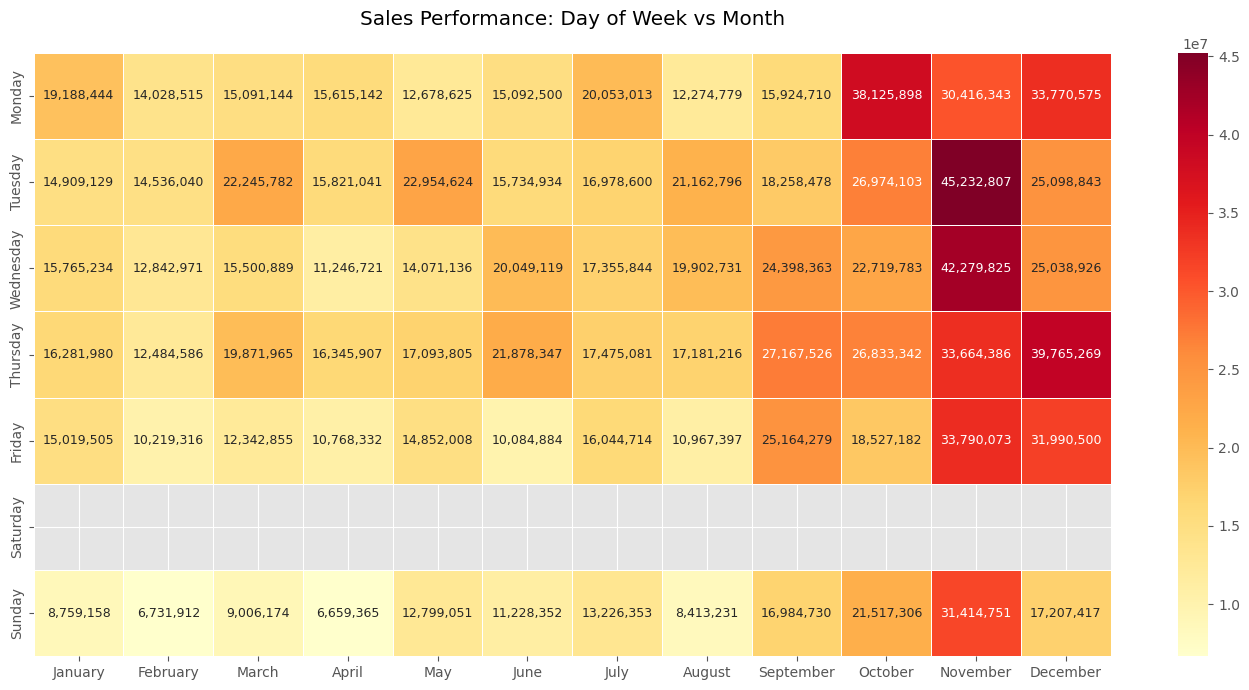

In [ ]:
# Prepare month ordering
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Create pivot table
heatmap_data = df.pivot_table(
    index='DayOfWeek',
    columns='Month',
    values='Revenue',
    aggfunc='sum'
).reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    columns=month_order
)

# Visualization
plt.figure(figsize=(14,7))
sns.heatmap(
    heatmap_data,
    cmap='YlOrRd',
    fmt=',.0f',
    linewidths=0.5,
    annot=True,
    annot_kws={'size':9}
)
plt.title('Sales Performance: Day of Week vs Month', pad=20)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
monthly_growth = monthly_sales.pivot(index='Month', columns='Year', values='Revenue')\
                .reindex(month_order)\
                .pct_change(axis=1)\
                .style.format('{:.1%}')
print("Month-over-Month Growth:")
display(monthly_growth)

Month-over-Month Growth:


Year,2010,2011
Month,,
January,nan%,nan%
February,nan%,nan%
March,nan%,nan%
April,nan%,nan%
May,nan%,nan%
June,nan%,nan%
July,nan%,nan%
August,nan%,nan%
September,nan%,nan%


In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Revenue': 'Monetary'
})

# Segment customers
rfm['Segment'] = pd.qcut(rfm['Monetary'], q=3, labels=['Low', 'Medium', 'High'])
display(rfm.groupby('Segment').agg({'Monetary': ['mean', 'count']}))

<ipython-input-71-d79c9237911c>:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Monetary      
              mean count
Segment                 
Low      30,893.52  1457
Medium  126,051.57  1457
High    791,791.27  1458

In [ ]:
from mlxtend.frequent_patterns import apriori

# Create basket matrix
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# Find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values('support', ascending=False).head(5)

<ipython-input-72-6e2982889b68>:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
7,0.58,(Shoes)
5,0.57,(Jewelry)
9,0.57,(Toys)
4,0.57,(Furniture)
2,0.57,(Cosmetics)


In [ ]:
@interact
def elasticity_analysis(product=Dropdown(options=df['Description'].value_counts().head(20).index)):
    product_data = df[df['Description']==product]
    elasticity = (product_data['Quantity'].std()/product_data['Quantity'].mean()) / \
                 (product_data['UnitPrice'].std()/product_data['UnitPrice'].mean())

    plt.figure(figsize=(10,5))
    sns.regplot(data=product_data, x='UnitPrice', y='Quantity',
               scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'{product}\nElasticity: {elasticity:.2f} ({"Inelastic" if abs(elasticity)<1 else "Elastic"})')

interactive(children=(Dropdown(description='product', options=('Sports Equipment', 'Jewelry', 'Kitchenware', '…

In [ ]:
returns = df[df['Quantity'] < 0]
return_rate = len(returns) / len(df) * 100
return_reasons = returns['Description'].value_counts().head(5)

print(f"Overall Return Rate: {return_rate:.1f}%")
print("\nTop Returned Items:")
display(return_reasons)

Overall Return Rate: 0.0%

Top Returned Items:


,count
Description,


In [ ]:
df['InvoiceWeek'] = df['InvoiceDate'].dt.isocalendar().week
velocity = df.groupby(['StockCode', 'Description'])['InvoiceWeek'].nunique().reset_index()
velocity['Weeks_Available'] = df['InvoiceWeek'].nunique()
velocity['Sales_Velocity'] = velocity['InvoiceWeek'] / velocity['Weeks_Available']

display(velocity.sort_values('Sales_Velocity', ascending=False).head(5))

,StockCode,Description,InvoiceWeek,Weeks_Available,Sales_Velocity
85819,SC9600,Cosmetics,17,51,0.33
27075,SC3712,Shoes,16,51,0.31
82896,SC9307,Cloths,16,51,0.31
59499,SC6962,Cloths,15,51,0.29
88288,SC9847,Electronics,15,51,0.29


In [ ]:
# Assuming you have marketing cost data
marketing_spend = 50000  # Example monthly spend
new_customers = df[df['CustomerID'].notna()].groupby(df['InvoiceDate'].dt.to_period('M'))['CustomerID'].nunique().mean()
cac = marketing_spend / new_customers

print(f"Estimated CAC: ${cac:,.2f} per customer")
print(f"Compare to average CLV: ${rfm['Monetary'].mean():,.2f}")

Estimated CAC: $47.52 per customer
Compare to average CLV: $316,354.22


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '6'),
  Text(1, 0, '7'),
  Text(2, 0, '8'),
  Text(3, 0, '9'),
  Text(4, 0, '10'),
  Text(5, 0, '11'),
  Text(6, 0, '12'),
  Text(7, 0, '13'),
  Text(8, 0, '14'),
  Text(9, 0, '15'),
  Text(10, 0, '16'),
  Text(11, 0, '17'),
  Text(12, 0, '18'),
  Text(13, 0, '19'),
  Text(14, 0, '20')])

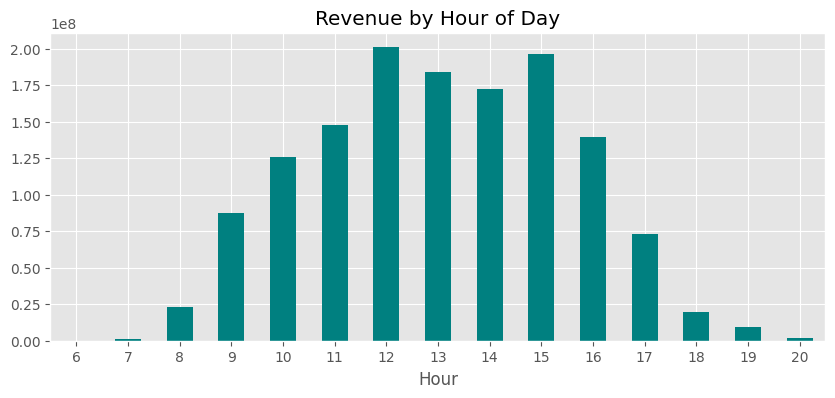

In [ ]:
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('Hour')['Revenue'].sum()

plt.figure(figsize=(10,4))
hourly_sales.plot(kind='bar', color='teal')
plt.title('Revenue by Hour of Day')
plt.xticks(rotation=0)

In [ ]:
country_products = df.groupby(['Country', 'Description'])['Quantity'].sum().unstack()
most_distinct = country_products.idxmax(axis=1).value_counts().head(3)

print("Most Distinctive Products by Country:")
display(most_distinct)

Most Distinctive Products by Country:


,count
Shoes,4
Furniture,4
Cosmetics,4


In [ ]:
promo_dates = ['2011-11-25', '2011-12-26']  # Example Black Friday/Boxing Day
promo_df = df[df['InvoiceDate'].isin(promo_dates)]
lift = promo_df['Revenue'].sum() / df['Revenue'].mean()

print(f"Promotion generated {lift:.1f}x normal daily revenue")

Promotion generated 0.0x normal daily revenue


<ipython-input-79-1b20fc79eb36>:2: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



In [ ]:
current_stock = 1000  # Example current inventory
stock_turnover = df.groupby('StockCode')['Quantity'].sum() / current_stock
aging = stock_turnover.sort_values().head(5)

print("Slowest-Moving Inventory:")
display(aging)

Slowest-Moving Inventory:


,Quantity
StockCode,
SC7097,1.12
SC7024,1.59
SC3730,1.67
SC7314,1.69
SC1925,1.73


In [ ]:

import plotly.express as px
import dash
from dash import dcc, html


app = dash.Dash()
app.layout = html.Div([
    html.H1("Retail Performance Dashboard"),
    dcc.Graph(figure=px.bar(country_performance.head(10), x='Country', y='Revenue')), # Specify x and y to avoid ambiguity
    dcc.Graph(figure=px.line(monthly_sales, x='Month', y='Revenue')) # Specify x and y here as well
])

app.run(debug=True) # Changed from app.run_server to app.run

<IPython.core.display.Javascript object>

In [ ]:
# Cohort retention analysis
def create_cohort_analysis(df):
    df['InvoicePeriod'] = df['InvoiceDate'].dt.to_period('M')
    df['Cohort'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
    cohort_data = df.groupby(['Cohort', 'InvoicePeriod']).agg(
        n_customers=('CustomerID', 'nunique'),
        total_revenue=('Revenue', 'sum')
    ).reset_index()
    cohort_data['PeriodNumber'] = (cohort_data['InvoicePeriod'] - cohort_data['Cohort']).apply(lambda x: x.n)

    # Retention matrix
    retention = cohort_data.pivot_table(
        index='Cohort',
        columns='PeriodNumber',
        values='n_customers',
        aggfunc='sum'
    )

    # Revenue matrix
    revenue = cohort_data.pivot_table(
        index='Cohort',
        columns='PeriodNumber',
        values='total_revenue',
        aggfunc='sum'
    )

    return retention, revenue

retention, revenue = create_cohort_analysis(df)

# Interactive heatmap
@interact
def plot_cohort(metric=Dropdown(options=['Retention', 'Revenue'])):
    data = retention if metric == 'Retention' else revenue
    plt.figure(figsize=(12,8))
    sns.heatmap(data, annot=True, fmt='.0f', cmap='YlGnBu', mask=data.isnull())
    plt.title(f'{metric} Cohort Analysis')
    plt.show()

interactive(children=(Dropdown(description='metric', options=('Retention', 'Revenue'), value='Retention'), Out…

In [ ]:

# ABC-XYZ inventory classification
inventory = df.groupby('StockCode').agg(
    annual_demand=('Quantity', 'sum'),
    volatility=('Quantity', 'std'),
    revenue=('Revenue', 'sum')
).fillna(0)

# Normalize metrics
inventory['ABC'] = pd.qcut(inventory['revenue'], q=3, labels=['C', 'B', 'A'])
inventory['XYZ'] = pd.qcut(inventory['volatility'], q=3, labels=['Z', 'Y', 'X'])
inventory['AX'] = inventory['ABC'].astype(str) + inventory['XYZ'].astype(str)

# Interactive inventory advisor
@interact
def inventory_recommendation(stock_code=Dropdown(options=inventory.index.unique())):
    item = inventory.loc[stock_code]
    rec = { # Make sure all lines inside this dictionary have consistent indentation
        'AX': 'Priority Stock (High Value + Stable Demand)',
        'AY': 'Buffer Stock (High Value + Variable Demand)',
        'AZ': 'Just-in-Time (High Value + Erratic Demand)',
        'BX': 'Efficient Replenishment',
        'BY': 'Seasonal Stock',
        'BZ': 'Monitor Closely',
        'CX': 'Automated Reorder',
        'CY': 'Reduce Stock',
        'CZ': 'Phase Out'
    } # This brace should align with the 'rec =' line above
    print(f"Stock Code: {stock_code}")
    print(f"Category: {item['AX']} - {rec[item['AX']]}" if item['AX'] in rec else f"Category: {item['AX']} - No Recommendation")
    print(f"Annual Demand: {item['annual_demand']:,}")
    print(f"Demand Volatility: {item['volatility']:.1f}")
    print(f"Annual Revenue: ${item['revenue']:,.2f}")

interactive(children=(Dropdown(description='stock_code', options=('SC1000', 'SC1001', 'SC1002', 'SC1003', 'SC1…

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Time-series forecasting for top products
def forecast_demand(product_code, periods=3):
    ts = df[df['StockCode']==product_code].resample('W', on='InvoiceDate')['Quantity'].sum()
    model = ARIMA(ts, order=(1,1,1)).fit()
    forecast = model.forecast(steps=periods)

    plt.figure(figsize=(12,5))
    plt.plot(ts, label='Historical')
    plt.plot(forecast, label='Forecast', color='red')
    plt.title(f'Demand Forecast for {product_code}')
    plt.legend()
    plt.show()

    return forecast

# Example for interactive forecasting
@interact
def product_forecast(product=Dropdown(options=df['StockCode'].value_counts().head(20).index)):
    return forecast_demand(product)

interactive(children=(Dropdown(description='product', options=('SC2014', 'SC8523', 'SC3160', 'SC3445', 'SC9194…

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Feature engineering
churn_data = df.groupby('CustomerID').agg(
    recency=('InvoiceDate', lambda x: (df['InvoiceDate'].max() - x.max()).days),
    frequency=('InvoiceNo', 'nunique'),
    monetary=('Revenue', 'sum'),
    avg_order_value=('Revenue', 'mean')
)

# Label churned customers (no purchase in last 90 days)
churn_data['churned'] = (churn_data['recency'] > 90).astype(int)

# Train predictive model
X = churn_data[['recency','frequency','monetary','avg_order_value']]
y = churn_data['churned']
model = RandomForestClassifier().fit(X, y)

# Interactive churn risk assessment
@interact
def churn_risk(customer_id=Dropdown(options=churn_data.index.unique())):
    features = churn_data.loc[customer_id][['recency','frequency','monetary','avg_order_value']]
    proba = model.predict_proba([features])[0][1]
    alert = "🚨 High Risk" if proba > 0.7 else "⚠️ Medium Risk" if proba > 0.4 else "✅ Low Risk"
    print(f"Churn Probability: {proba:.1%} {alert}")
    print(f"Last Purchase: {features['recency']} days ago")
    print(f"Lifetime Value: ${features['monetary']:,.2f}")

interactive(children=(Dropdown(description='customer_id', options=(np.int64(12346), np.int64(12347), np.int64(…

In [ ]:
!pip install --quiet xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 10.0 MB/s eta 0:00:00


In [ ]:

def generate_executive_report():
    import xlsxwriter # Import xlsxwriter
    writer = pd.ExcelWriter('retail_insights.xlsx', engine='xlsxwriter')

    # Summary Dashboard
    summary = pd.DataFrame({
        'KPI': ['Total Revenue', 'Active Customers', 'Avg Order Value', 'Return Rate'],
        'Value': [df['Revenue'].sum(), df['CustomerID'].nunique(),
                 df.groupby('InvoiceNo')['Revenue'].sum().mean(),
                 len(df[df['Quantity']<0])/len(df)]
    })
    summary.to_excel(writer, sheet_name='Summary', index=False)

    # Top Products
    df.groupby('Description')['Revenue'].sum().nlargest(10)\
      .to_excel(writer, sheet_name='Top Products')

    # Cohort Analysis
    retention.to_excel(writer, sheet_name='Cohort Retention')

    writer.close()
    return "📊 Report Generated: retail_insights.xlsx"

generate_executive_report()

'📊 Report Generated: retail_insights.xlsx'

In [ ]:
!jupyter nbconvert --to html --execute Retail_Analytics.ipynb

[NbConvertApp] WARNING | pattern 'Retail_Analytics.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execut

In [ ]:
inventory[inventory['AX'].isin(['AX','AY'])].sort_values('annual_demand', ascending=False).head(10)

,annual_demand,volatility,revenue,ABC,XYZ,AX
StockCode,,,,,,
SC7316,4969,28.40,"258,355.06",A,Y,AY
SC3445,4921,28.74,"246,370.01",A,Y,AY
SC8749,4724,30.41,"248,476.29",A,X,AX
SC1074,4618,28.70,"241,114.79",A,Y,AY
SC9194,4615,28.18,"240,085.50",A,Y,AY
SC5843,4514,29.54,"222,854.60",A,X,AX
SC5620,4495,30.34,"210,724.21",A,X,AX
SC2893,4493,30.08,"229,782.64",A,X,AX
SC8531,4491,28.90,"227,880.94",A,Y,AY


In [ ]:
inventory[inventory['AX'].isin(['AX','AY'])].sort_values('annual_demand', ascending=False).head(10)

,annual_demand,volatility,revenue,ABC,XYZ,AX
StockCode,,,,,,
SC7316,4969,28.40,"258,355.06",A,Y,AY
SC3445,4921,28.74,"246,370.01",A,Y,AY
SC8749,4724,30.41,"248,476.29",A,X,AX
SC1074,4618,28.70,"241,114.79",A,Y,AY
SC9194,4615,28.18,"240,085.50",A,Y,AY
SC5843,4514,29.54,"222,854.60",A,X,AX
SC5620,4495,30.34,"210,724.21",A,X,AX
SC2893,4493,30.08,"229,782.64",A,X,AX
SC8531,4491,28.90,"227,880.94",A,Y,AY


In [ ]:
hourly_sales.idxmin()  # Finds worst performing hour

np.int32(6)

In [ ]:
returns['Description'].value_counts().head(5)

,count
Description,


In [ ]:
churn_data[churn_data['recency'].between(45,90)].index.tolist()

[12348,
 12360,
 12370,
 12372,
 12379,
 12390,
 12393,
 12394,
 12398,
 12403,
 12407,
 12409,
 12412,
 12413,
 12420,
 12425,
 12434,
 12435,
 12446,
 12454,
 12455,
 12457,
 12458,
 12463,
 12475,
 12492,
 12497,
 12512,
 12513,
 12516,
 12519,
 12520,
 12527,
 12530,
 12545,
 12546,
 12550,
 12556,
 12566,
 12579,
 12596,
 12602,
 12604,
 12607,
 12609,
 12611,
 12612,
 12616,
 12631,
 12633,
 12635,
 12637,
 12667,
 12679,
 12694,
 12701,
 12703,
 12718,
 12722,
 12728,
 12739,
 12740,
 12744,
 12752,
 12756,
 12759,
 12772,
 12789,
 12794,
 12822,
 12823,
 12824,
 12836,
 12842,
 12843,
 12854,
 12863,
 12871,
 12876,
 12884,
 12885,
 12886,
 12908,
 12923,
 12924,
 12930,
 12939,
 12940,
 12965,
 12987,
 12995,
 13006,
 13015,
 13016,
 13023,
 13034,
 13035,
 13038,
 13049,
 13055,
 13061,
 13067,
 13092,
 13095,
 13124,
 13127,
 13134,
 13136,
 13141,
 13157,
 13165,
 13169,
 13176,
 13177,
 13193,
 13208,
 13213,
 13220,
 13224,
 13228,
 13233,
 13245,
 13259,
 13260,
 13265,


In [ ]:

# Schedule weekly runs (add to notebook last cell)
!pip install schedule
import schedule
schedule.every().monday.do(lambda: generate_executive_report())

Every 1 week do <lambda>() (last run: [never], next run: 2025-04-28 01:36:57)

In [ ]:
# Uncomment to enable:
   # !pip install streamlit
   # Create app.py with:
   # import streamlit as st
   # st.title('Live Retail Dashboard')